In [1]:
from __future__ import annotations
from jetnet.datasets import JetNet
print(f"Particle features: {JetNet.ALL_PARTICLE_FEATURES}")
print(f"Jet features: {JetNet.ALL_JET_FEATURES}")

/Users/arjunsharma/development/s25-fermilab-research/venv/lib/python3.12/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


Particle features: ['etarel', 'phirel', 'ptrel', 'mask']
Jet features: ['type', 'pt', 'eta', 'mass', 'num_particles']


In [2]:
data_args = {
    "jet_type": ["g", "q", "t"],  # gluon, top quark, and W boson jets
    "data_dir": "datasets/jetnet",
    # only selecting the kinematic features
    "particle_features": ["etarel", "phirel", "ptrel"],
    "num_particles": 30,
    "jet_features": ["type", "pt", "eta", "mass"],
    "download": True,
}

particle_data, jet_data = JetNet.getData(**data_args)

[██████████████████████████████████████████████████] 100%


In [3]:
print(
    f"Particle features of the 10 highest pT particles in the first jet\n{data_args['particle_features']}\n{particle_data[0, :10]}"
)
print(f"\nJet features of first jet\n{data_args['jet_features']}\n{jet_data[0]}")

Particle features of the 10 highest pT particles in the first jet
['etarel', 'phirel', 'ptrel']
[[ 0.02522453 -0.0110801   0.20484282]
 [ 0.02528558 -0.01466267  0.20254165]
 [ 0.02772453 -0.01358136  0.10186516]
 [ 0.03522453 -0.01108011  0.07157628]
 [ 0.02279488 -0.01685968  0.0553214 ]
 [ 0.03578603 -0.02819797  0.03991229]
 [ 0.01680043 -0.00981957  0.03427737]
 [ 0.04369062 -0.00769098  0.0255819 ]
 [ 0.02735003 -0.02599614  0.02429028]
 [ 0.01707988 -0.01096773  0.01907269]]

Jet features of first jet
['type', 'pt', 'eta', 'mass']
[ 0.00000000e+00  9.71209839e+02 -6.02245331e-02  1.08700569e+02]


In [4]:
import matplotlib.pyplot as plt
from jetnet.utils import to_image

num_images = 5
num_types = len(data_args["jet_type"])
print(f"{num_types=}")
im_size = 25
maxR = 0.4

j_colormap = plt.cm.jet.copy()
j_colormap.set_under(color="white")

num_types=3


<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\e'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\e'
/var/folders/nf/5j1mvt3s2xxg28f4qcpqlhx40000gn/T/ipykernel_82297/1507521810.py:34: SyntaxWarning: invalid escape sequence '\p'
  axes[j][i].set_xlabel("$\phi^{rel}$")
/var/folders/nf/5j1mvt3s2xxg28f4qcpqlhx40000gn/T/ipykernel_82297/1507521810.py:35: SyntaxWarning: invalid escape sequence '\e'
  axes[j][i].set_ylabel("$\eta^{rel}$")


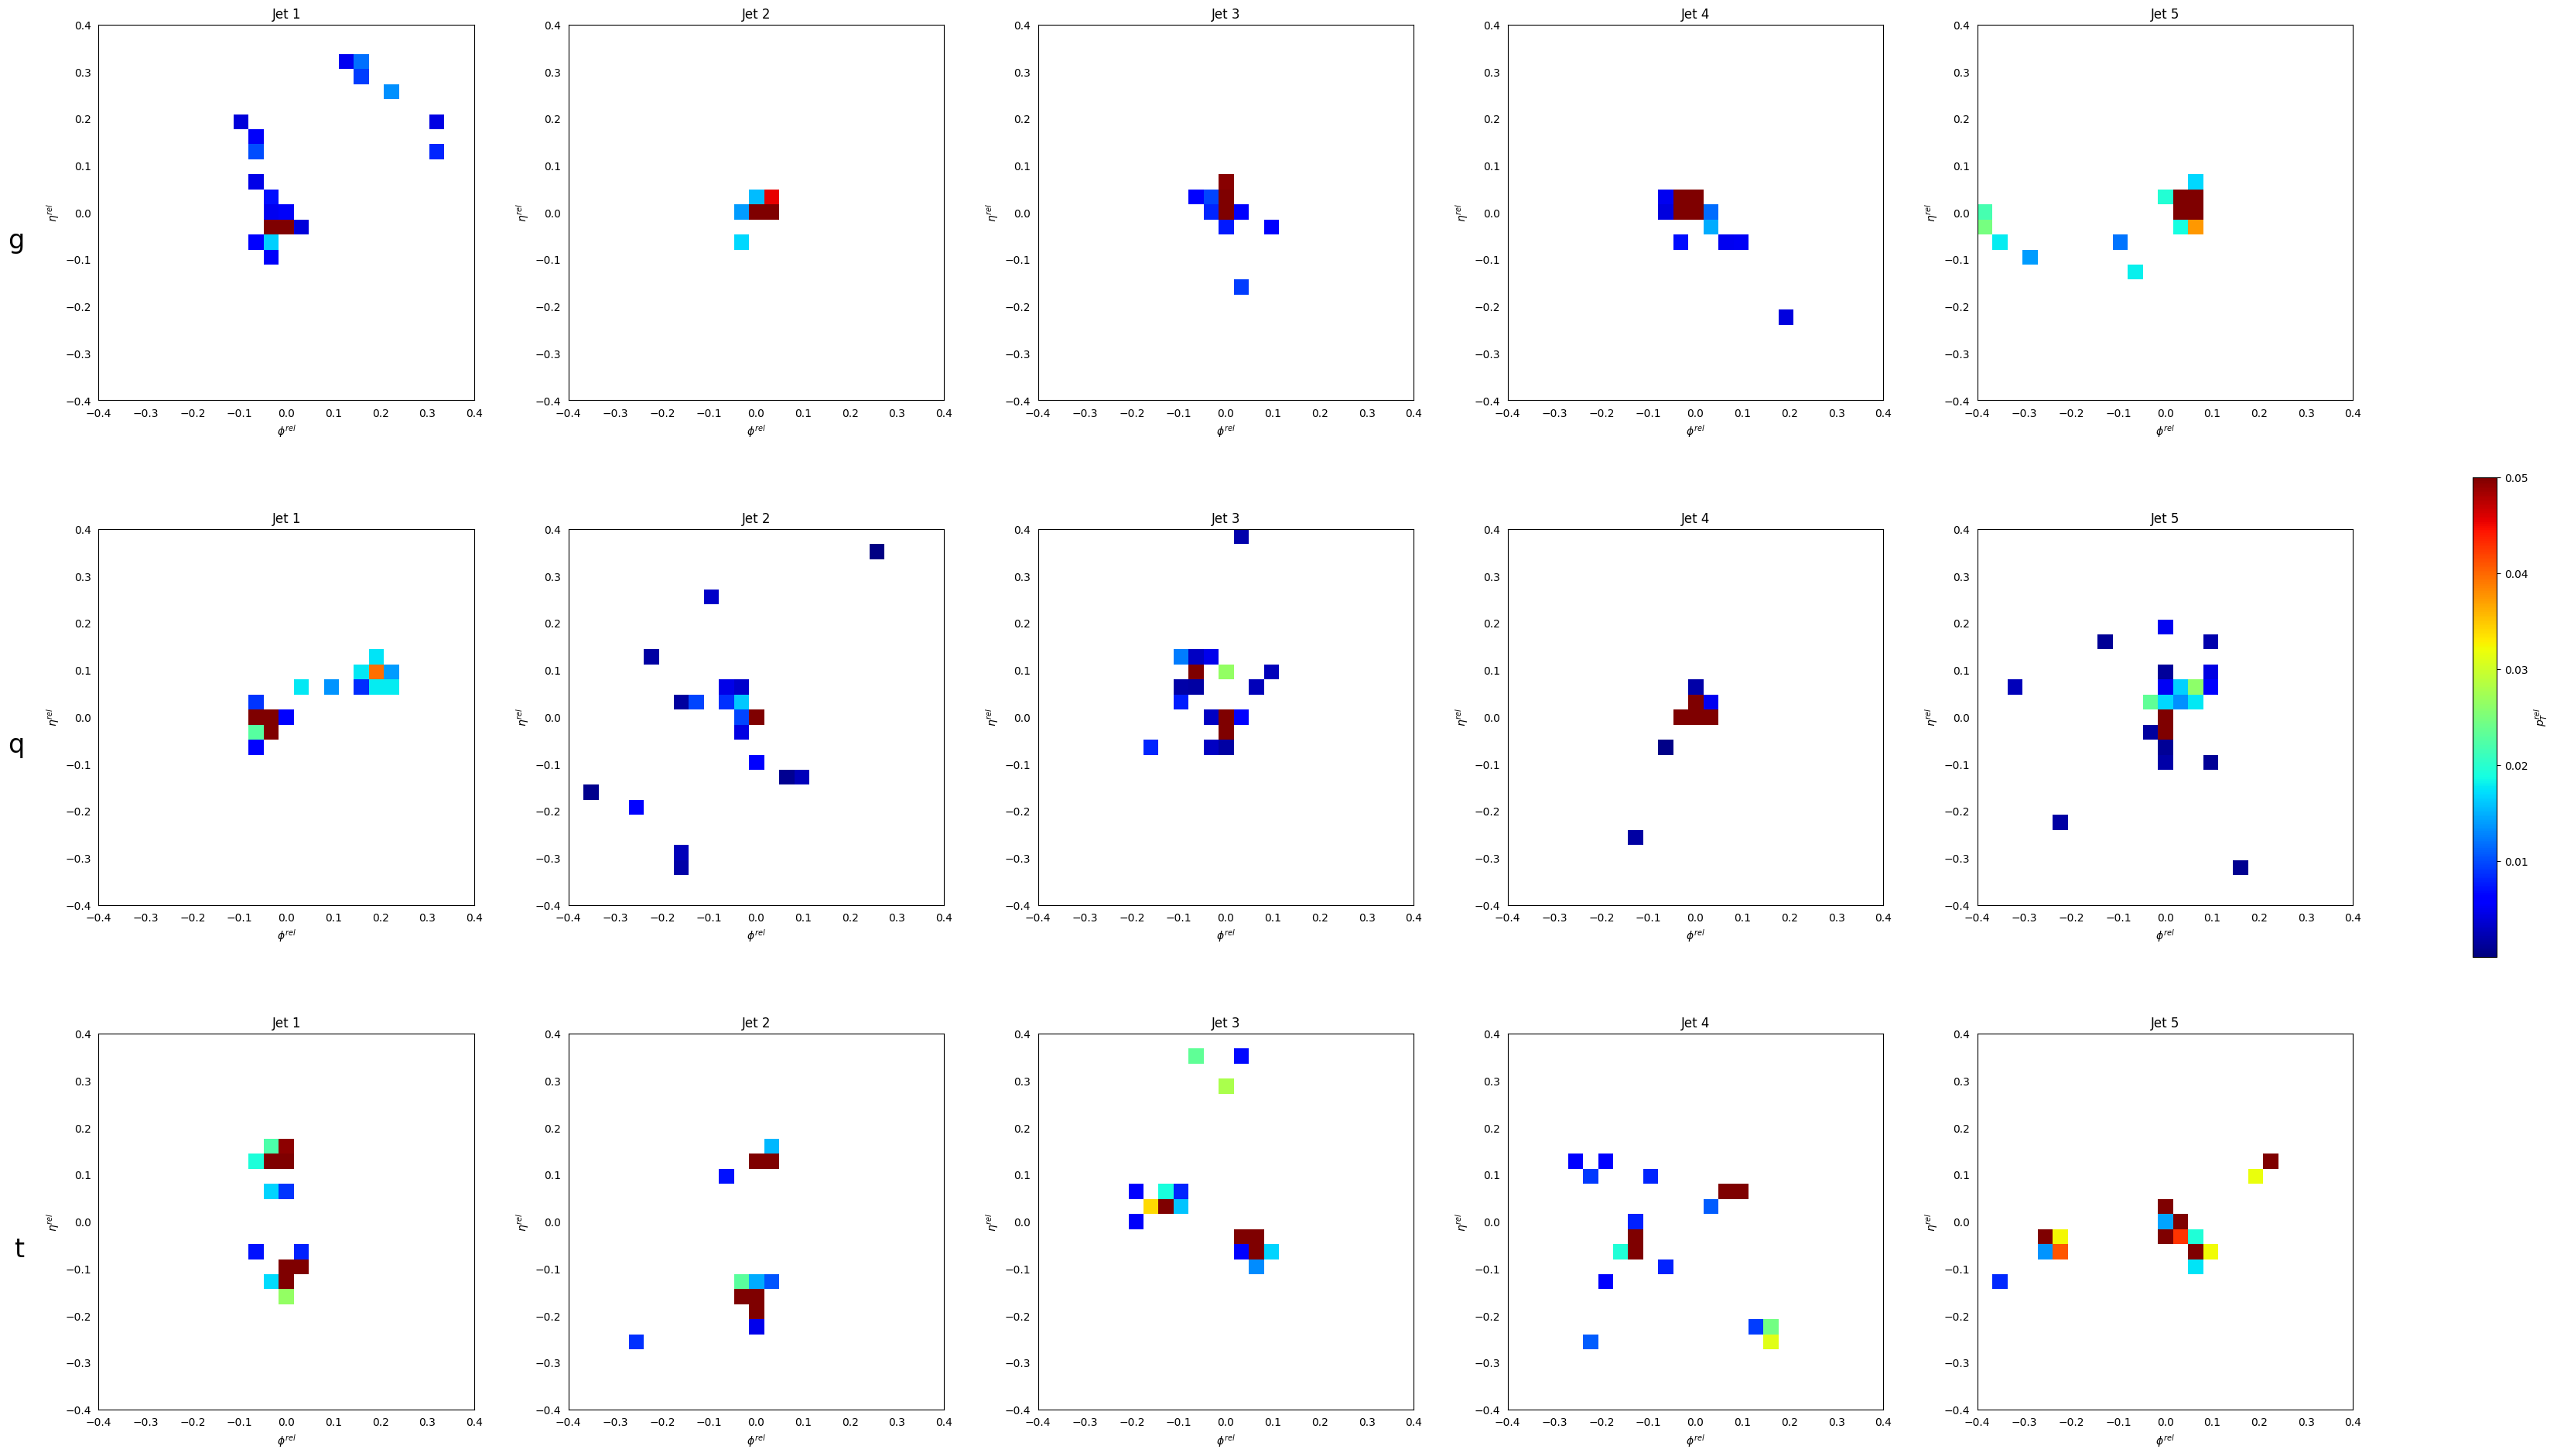

In [5]:
fig, axes = plt.subplots(
    nrows=num_types,
    ncols=num_images,
    figsize=(40, 8 * num_types),
    gridspec_kw={"wspace": 0.25},
)
type_indices = {jet_type: JetNet.JET_TYPES.index(jet_type) for jet_type in data_args["jet_type"]}

for j in range(num_types):
    jet_type = data_args["jet_type"][j]
    # first column contains type data
    type_selector = jet_data[:, 0] == type_indices[jet_type]  # select jets based on jet_type feat
    axes[j][0].annotate(
        jet_type,
        xy=(0, -1),
        xytext=(-axes[j][0].yaxis.labelpad - 15, 0),
        xycoords=axes[j][0].yaxis.label,
        textcoords="offset points",
        ha="right",
        va="center",
        fontsize=24,
    )

    for i in range(num_images):
        im = axes[j][i].imshow(
            to_image(particle_data[type_selector][i], im_size, maxR=maxR),
            cmap=j_colormap,
            interpolation="nearest",
            vmin=1e-8,
            extent=[-maxR, maxR, -maxR, maxR],
            vmax=0.05,
        )
        axes[j][i].tick_params(which="both", bottom=False, top=False, left=False, right=False)
        axes[j][i].set_xlabel("$\phi^{rel}$")
        axes[j][i].set_ylabel("$\eta^{rel}$")
        axes[j][i].set_title(f"Jet {i + 1}")

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), fraction=0.01)
cbar.set_label("$p_T^{rel}$")

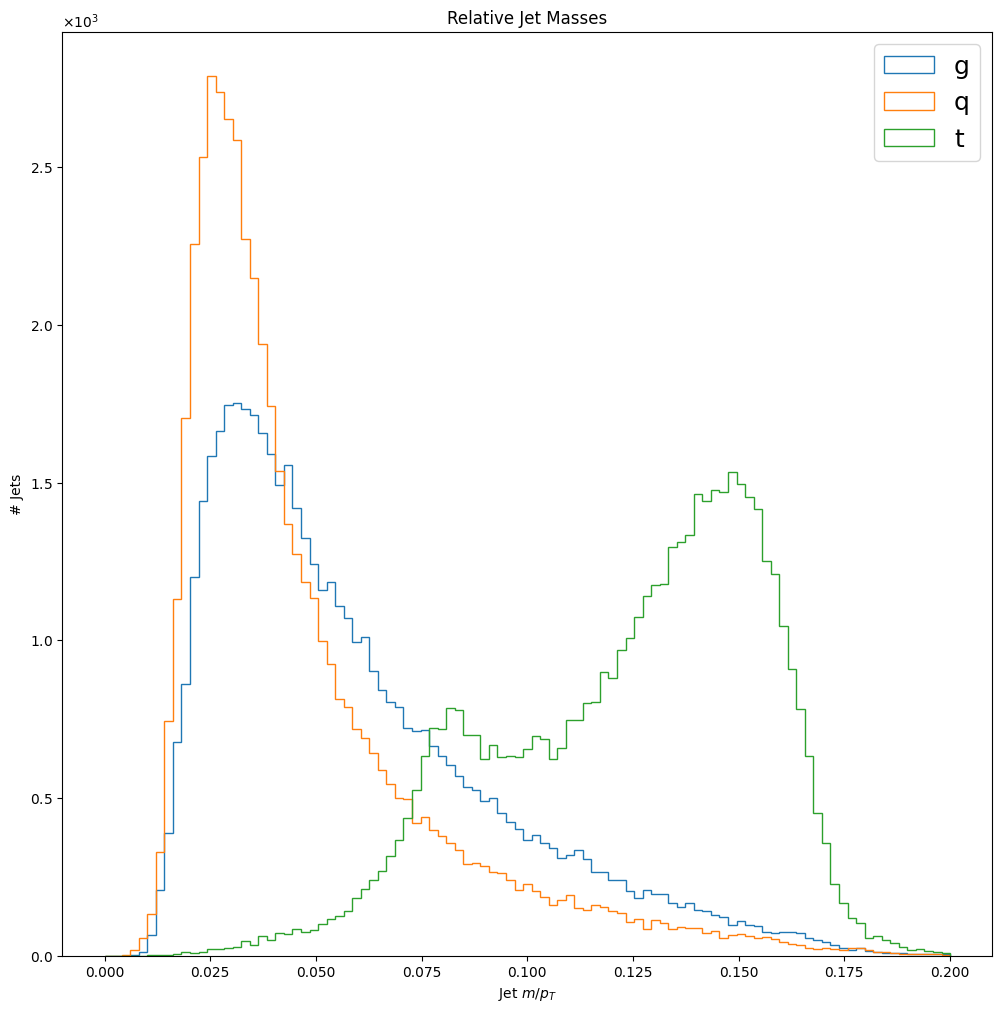

In [6]:
import numpy as np
from jetnet.utils import jet_features

fig = plt.figure(figsize=(12, 12))
plt.ticklabel_format(axis="y", scilimits=(0, 0), useMathText=True)

for j in range(num_types):
    jet_type = data_args["jet_type"][j]
    type_selector = jet_data[:, 0] == type_indices[jet_type]  # select jets based on jet_type feat

    jet_masses = jet_features(particle_data[type_selector][:50000])["mass"]
    _ = plt.hist(jet_masses, bins=np.linspace(0, 0.2, 100), histtype="step", label=jet_type)

plt.xlabel("Jet $m/p_{T}$")
plt.ylabel("# Jets")
plt.legend(loc=1, prop={"size": 18})
plt.title("Relative Jet Masses")
plt.show()

In [ ]:
import numpy as np
from jetnet.datasets import JetNet
from jetnet.datasets.normalisations import FeaturewiseLinear
from sklearn.preprocessing import OneHotEncoder


# function to one hot encode the jet type and leave the rest of the features as is
# assume that 0 [1, 0] is gluon and 1 is top (t) [0, 1]
def OneHotEncodeType(x: np.ndarray):
    enc = OneHotEncoder(sparse_output=False)
    type_encoded = enc.fit_transform(x[..., 0].reshape(-1, 1))
    other_features = x[..., 1:].reshape(-1, 3)
    return np.concatenate((type_encoded, other_features), axis=-1).reshape(*x.shape[:-1], -1)


data_args = {
    "jet_type": ["g", "t"],  # gluon and top quark jets
    "data_dir": "datasets/jetnet",
    # these are the default particle features, written here to be explicit
    "particle_features": ["etarel", "phirel", "ptrel", "mask"],
    "num_particles": 10,  # we retain only the 10 highest pT particles for this demo
    "jet_features": ["type", "pt", "eta", "mass"],
    # we don't want to normalise the 'mask' feature so we set that to False
    "particle_normalisation": FeaturewiseLinear(
        normal=True, normalise_features=[True, True, True, False]
    ),
    # pass our function as a transform to be applied to the jet features
    "jet_transform": OneHotEncodeType,
    "download": True,
}

jets_train = JetNet(**data_args, split="train")
jets_valid = JetNet(**data_args, split="valid")

In [8]:
jets_train

Dataset JetNet
    Number of datapoints: 248637
    Data location: datasets/jetnet
    Including ['g', 't'] jets
    Split into train data out of ['train', 'valid', 'test', 'all'] possible splits, with splitting fractions [0.7, 0.15, 0.15]
    Particle features: ['etarel', 'phirel', 'ptrel', 'mask'], max 10 particles per jet
    Jet features: ['type', 'pt', 'eta', 'mass']
    Particle normalisation: Normalising features to zero mean and unit standard deviation, normalising features: [True, True, True, False]
    Jet transform: <function OneHotEncodeType at 0x331e82520>

In [9]:
jets_train[0]

(tensor([[ 0.0663,  0.0677,  0.1384,  1.0000],
         [ 0.0594,  0.0806,  0.1115,  1.0000],
         [-0.1404, -0.0924,  0.0937,  1.0000],
         [-0.1381, -0.0970,  0.0838,  1.0000],
         [-0.1406, -0.0895,  0.0747,  1.0000],
         [ 0.0556,  0.0739,  0.0714,  1.0000],
         [ 0.0555,  0.0682,  0.0424,  1.0000],
         [ 0.0629,  0.0853,  0.0423,  1.0000],
         [ 0.0387,  0.0765,  0.0413,  1.0000],
         [ 0.0494,  0.0706,  0.0311,  1.0000]]),
 tensor([ 1.0000e+00,  1.0050e+03, -3.0688e-01,  1.5198e+02]))

In [10]:
data_args = {
    "jet_type": ["g", "t"],  # gluon and top quark jets
    "data_dir": "datasets/jetnet",
    # these are the default particle features, written here to be explicit
    "particle_features": ["etarel", "phirel", "ptrel", "mask"],
    "num_particles": 10,  # we retain only the 10 highest pT particles for this demo
    "jet_features": ["type", "pt", "eta", "mass"],
    # we don't want to normalise the 'mask' feature so we set that to False
    "particle_normalisation": FeaturewiseLinear(
        normal=True, normalise_features=[True, True, True, False]
    ),
    # pass our function as a transform to be applied to the jet features
    # "jet_transform": OneHotEncodeType,
    "download": True,
}

jets = JetNet(**data_args, split="train")


In [11]:
jets[..., 0]

(tensor([[ 0.0663,  0.0594, -0.1404,  ...,  0.0629,  0.0387,  0.0494],
         [-0.0066, -0.0041,  0.0034,  ...,  0.0009,  0.0061, -0.0091],
         [ 0.0430,  0.0307,  0.0311,  ...,  0.0099,  0.0316, -0.0566],
         ...,
         [ 0.0616,  0.0569,  0.0566,  ...,  0.0317,  0.0495, -0.2434],
         [ 0.0004, -0.0035, -0.0071,  ...,  0.0201, -0.0228,  0.0029],
         [ 0.0477, -0.0586,  0.0643,  ..., -0.0798,  0.0410, -0.0830]]),
 tensor([2., 0., 0.,  ..., 0., 0., 0.]))